In [15]:
from selenium import webdriver
import time
driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
driver.get("https://www.instagram.com")
time.sleep(2)
email = 'djagkdbs@naver.com'  
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'dytjq7169' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:7: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:12: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [16]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url
def select_first(driver):
    first = driver.find_element_by_css_selector("div._aagw")
    first.click()
    time.sleep(4)
def move_next(driver):
    right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")
    right.click()
    time.sleep(4)
def get_content(driver):
    import re
    from bs4 import BeautifulSoup
    import unicodedata  
    html = driver.page_source
    soup = BeautifulSoup(html,"html.parser")
    try:
        content = soup.select("div._a9zs > span")[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    tags = re.findall(r'#[^\s#,\\]+', content)
    date = soup.select("time._aaqe")[0]['datetime'][:10]
    try:
        like = soup.select("div._aacl._aaco._aacw._aacx._aada._aade > span")[0].text
    except:
        like = 0
    try: 
        place = soup.select("a.oajrlxb2")[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data 



In [17]:
def crawling(driver,words):
    results=[]
    for word in words:
        url=insta_searching(word)
        driver.get(url)
        time.sleep(10)
        select_first(driver)
        target=300
        for i in range(target):
            try:
                data = get_content(driver)
                results.append(data)
                move_next(driver)
            except:
                time.sleep(3)
                move_next(driver)
    return results

In [1]:
china=['중국여행','중국관광']
japan=['일본여행','일본맛집']
america=['미국여행','미국맛집']
taiwan=['태국여행','태국맛집']
vietnam=['베트남여행','베트남맛집']

In [ ]:
data=crawling(driver,china[0])
    

In [20]:
data=crawling(driver,japan)

C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\3909749391.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\3909749391.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")


NameError: name 'pd' is not defined

In [5]:
words_list={'china':china,'japan':japan,'america':america,'taiwan':taiwan,'vietnam':vietnam}
import pandas as pd
for key in words_list:
    data=crawling(driver,words_list[key])
    results_df=pd.DataFrame(data)
    results_df.columns=['content','date','like','place','tags']
    results_df.to_excel('country/'+key+'.xlsx',index=False)

C:\Users\djagk\AppData\Local\Temp\ipykernel_11548\3909749391.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
C:\Users\djagk\AppData\Local\Temp\ipykernel_11548\3909749391.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")


KeyboardInterrupt: 

In [21]:
import pandas as pd
results_df=pd.DataFrame(data)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('country/china.xlsx',index=False)

In [22]:
raw_total=pd.read_excel('country/china.xlsx')
tags_total=[]
for tags in raw_total['tags']:
    tags=tags[2:-2]
    tags_list=tags.split("', '")
    
    for tag in tags_list:
        if tag=='':
            continue
        tags_total.append(tag)
tags_total

from collections import Counter    
tag_counts=Counter(tags_total)

tag_counts.most_common(150)

[('#중국여행', 455),
 ('#Chinese', 411),
 ('#중국', 302),
 ('#중국관광', 286),
 ('#중국어', 168),
 ('#해외여행', 156),
 ('#중국어공부', 150),
 ('#비즈니스중국어', 147),
 ('#Travel', 139),
 ('#중국어학습', 138),
 ('#무료생활중국어', 137),
 ('#홍콩관광', 137),
 ('#무료중국어', 137),
 ('#무료학습', 137),
 ('#매일매일중국어', 137),
 ('#무료생활중국어앱', 137),
 ('#중국여행필수', 137),
 ('#언어교환', 137),
 ('#중국어소통', 137),
 ('#언어소통', 137),
 ('#언어교환소통', 137),
 ('#Language', 137),
 ('#Android', 137),
 ('#여행', 58),
 ('#여행스타그램', 53),
 ('#china', 41),
 ('#여행에미치다', 37),
 ('#북경', 32),
 ('#베이징', 28),
 ('#중국음식', 28),
 ('#여행사진', 27),
 ('#북경여행', 26),
 ('#일상', 26),
 ('#관광', 26),
 ('#자금성', 25),
 ('#여행지', 23),
 ('#中国', 22),
 ('#만리장성', 22),
 ('#中国旅游', 21),
 ('#장가계', 21),
 ('#등산', 21),
 ('#좋아요', 20),
 ('#상해', 20),
 ('#张家界', 19),
 ('#중국어회화', 19),
 ('#상하이', 18),
 ('#중국생활', 17),
 ('#소통', 16),
 ('#대련', 16),
 ('#중국유학', 16),
 ('#셀스타그램', 16),
 ('#중국드라마', 16),
 ('#청두', 15),
 ('#여행그램', 15),
 ('#천문동', 15),
 ('#관광지', 15),
 ('#데일리', 14),
 ('#베이징여행', 14),
 ('#쑤저우', 14),
 ('#장가계여행', 14),
 ('#이화원'

In [41]:
STOPWORD=['','#맞팔','#셀스타그램','#여행스타그램','#여행에미치다','#선팔하면맞팔','#중국여행','#중국','#중국관광','#Chinese','#홍콩관광','#Android']

tags_total_selected=[]
for tag in tags_total:
    if tag not in STOPWORD:
        tags_total_selected.append(tag)
tag_counts_selected=Counter(tags_total_selected)
tag_counts_selected.most_common(50)

[('#중국어', 168),
 ('#해외여행', 156),
 ('#중국어공부', 150),
 ('#비즈니스중국어', 147),
 ('#Travel', 139),
 ('#중국어학습', 138),
 ('#무료생활중국어', 137),
 ('#무료중국어', 137),
 ('#무료학습', 137),
 ('#매일매일중국어', 137),
 ('#무료생활중국어앱', 137),
 ('#중국여행필수', 137),
 ('#언어교환', 137),
 ('#중국어소통', 137),
 ('#언어소통', 137),
 ('#언어교환소통', 137),
 ('#Language', 137),
 ('#여행', 58),
 ('#china', 41),
 ('#북경', 32),
 ('#베이징', 28),
 ('#중국음식', 28),
 ('#여행사진', 27),
 ('#북경여행', 26),
 ('#일상', 26),
 ('#관광', 26),
 ('#자금성', 25),
 ('#여행지', 23),
 ('#中国', 22),
 ('#만리장성', 22),
 ('#中国旅游', 21),
 ('#장가계', 21),
 ('#등산', 21),
 ('#좋아요', 20),
 ('#상해', 20),
 ('#张家界', 19),
 ('#중국어회화', 19),
 ('#상하이', 18),
 ('#중국생활', 17),
 ('#소통', 16),
 ('#대련', 16),
 ('#중국유학', 16),
 ('#중국드라마', 16),
 ('#청두', 15),
 ('#여행그램', 15),
 ('#천문동', 15),
 ('#관광지', 15),
 ('#데일리', 14),
 ('#베이징여행', 14),
 ('#쑤저우', 14)]

In [27]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
import platform
if platform.system()=='Windows':
    font_path='c:/Windows/Fonts/malgun.ttf'
    

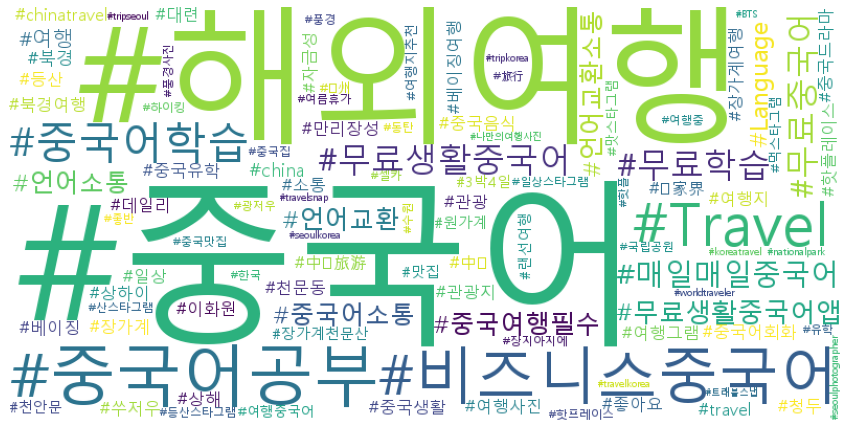

In [42]:
wordcloud=WordCloud(font_path=font_path,
                    background_color='white',
                    max_words=100,
                    relative_scaling=0.3,
                    width=800,
                    height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('data_instar/China.png')